<a href="https://colab.research.google.com/github/sauddy/DPCNet/blob/main/DPCNet_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DPCNet_ prediction 26 November

In [ ]:
##drive.mount('/content/drive')

In [ ]:
## This notebook is build to generate the plots for the paper
## We read the saved model and data to generate the plots for the paper

In [ ]:
# import the necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import cv2
import os

## Modules to check the performance of the code
from time import process_time 
#!pip install memory_profiler
import memory_profiler as mem_profile
print('Memory (Before): {}Mb'.format(mem_profile.memory_usage()))



from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

from sklearn.metrics import r2_score ## form calcualting the r2 score




Memory (Before): [104.17578125]Mb


In [ ]:
## Please provide the same path to the code directory
# path = '/content/drive/My Drive/CNN_DPNNET/CNN_DPNNet_dev/'
path = ''

import sys
sys.path.append(path+'Modules_DPCNet')
import data_processing as dp
print("[INFO] Modules imported")

We are currently using the Modules_DPCNet
[INFO] Modules imported


### Loading the data for plotting the model predictions #####

In [ ]:
# %cd /content/drive/My Drive/CNN_DPNNET/CNN_DPNNet_dev/
# !mkdir figures_paper

## for local computer 
!mkdir figures_paper

In [ ]:
## Making the directory for saving the figures for the Pape

# !mkdir -p figures_paper ## to save the figurs

## Loading the test dataset for testing the model and making the plots
train = pd.read_csv(path+'data_folder/train_dataset.csv',index_col=0) ## trained dataset
test = pd.read_csv(path+'data_folder/test_dataset.csv',index_col=0) ## test dataset

## Generate the Normalized data
normed_train_data, normed_test_data, train_labels, test_labels = dp.process_the_disk_attributes(train, test, path)

#### Desired Image resoltuion #####
X_res = Y_res = 32

## Generate the training and the test images 
# trainImagesX = dp.load_disk_images(train, X_res, Y_res, Type = "Train")
testImagesX = dp.load_disk_images(test, X_res, Y_res, Type = "Test")

[INFO] preparing the normalized data training/testing split...
[INFO] Done...
[INFO] Loading images from Test data..
Test Images are loaded


## Loading the CNN model

In [ ]:
## Select the Network type

# NETWORK = "Vanilla"
# NETWORK = "ALEXNET"
# NETWORK = "VGG"
NETWORK = "RESNET50"

CNN = tf.keras.models.load_model(path+'saved_model/'+NETWORK+'_model')
##Check its architecture
# CNN.summary()

## Model Evaluation for CNN

In [ ]:
loss, mae, mse = CNN.evaluate(testImagesX, test_labels, verbose=0)
print("Testing set Mean Square Error for {}: {:5.2f} ".format(NETWORK,mse))
print("Testing set Root Mean Square Error for {}: {:5.2f} M_Earth".format( NETWORK,np.sqrt(mse)))
print("Testing set Mean Abs Error for {} : {:5.2f} M_Earth ".format(NETWORK,mae))
print("Testing set Loss for {}: {:5.2f} M_Earth".format(NETWORK,loss))

Testing set Mean Square Error for RESNET50: 6068.59 
Testing set Root Mean Square Error for RESNET50: 77.90 M_Earth
Testing set Mean Abs Error for RESNET50 : 71.56 M_Earth 
Testing set Loss for RESNET50: 6068.59 M_Earth


## Loading the Hybrid model

In [ ]:
hybrid_model = tf.keras.models.load_model(path+'saved_model/'+NETWORK+'_hybrid_model')
# hybrid_model.summary()

## Model Evaluation for Hybrid Model

In [ ]:
loss, mae, mse = hybrid_model.evaluate([normed_test_data,testImagesX], test_labels, verbose=0)
print("Testing set Mean Square Error for {} with DPNNet: {:5.2f} ".format(NETWORK,mse))
print("Testing set Root Mean Square Error for {} with DPNNet: {:5.2f} M_Earth".format( NETWORK,np.sqrt(mse)))
print("Testing set Mean Abs Error for {} with DPNNet: {:5.2f} M_Earth ".format(NETWORK,mae))
print("Testing set Loss for {} with DPNNet: {:5.2f} M_Earth".format(NETWORK,loss))

Testing set Mean Square Error for RESNET50 with DPNNet: 6230.78 
Testing set Root Mean Square Error for RESNET50 with DPNNet: 78.94 M_Earth
Testing set Mean Abs Error for RESNET50 with DPNNet: 72.70 M_Earth 
Testing set Loss for RESNET50 with DPNNet: 6230.80 M_Earth


## Model Predictions and Results

In [ ]:
pred_CNN = CNN.predict(testImagesX)
np.shape(pred_CNN)
pred_Hybird = hybrid_model.predict([normed_test_data,testImagesX])
np.shape(pred_Hybird)

(442, 1)

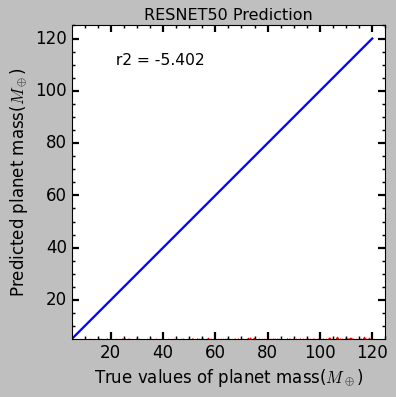

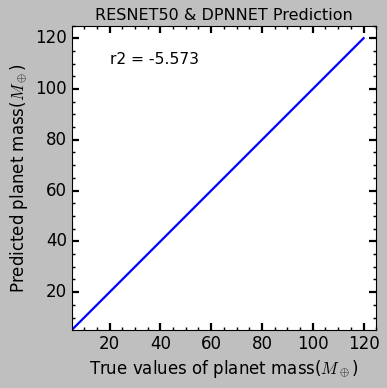

In [ ]:
plt.style.use('classic')
plt.figure(figsize = (5,5))
# test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels,pred_CNN.flatten(),s=30,marker='d',color='r')
score_CNN = r2_score(test_labels,pred_CNN.flatten())
plt.text(20,110,r" r2 = {:.3f}".format(score_CNN), fontsize =14)
plt.xlabel(r'True values of planet mass($M_\oplus$)', fontsize=15)
plt.ylabel(r'Predicted planet mass($M_\oplus$)',fontsize=15)
plt.title("{} Prediction".format(NETWORK))
plt.axis('equal')
plt.axis('square')
plt.xlim(5,125)
plt.ylim(5,125)
# plt.xlim([0.6,plt.xlim()[1]])
# plt.ylim([0.6,plt.xlim()[1]])
_ = plt.plot([0, 120], [0, 120],linewidth=2)
plt.minorticks_on() 
plt.tight_layout()
plt.savefig('figures_paper/predicted_correlation_{}.pdf'.format(NETWORK),format='pdf',dpi=300)

plt.tick_params(labelsize=15)

plt.tick_params(axis='both', which='major',length=6, width=2)
plt.tick_params(axis='both', which='minor',length=3, width=1.3)
plt.figure(figsize = (5,5))
plt.scatter(test_labels,pred_Hybird.flatten(),s=20,marker='d',color='r')
score_HYBRID = r2_score(test_labels,pred_Hybird.flatten())
plt.text(20,110,r"r2 = {:.3f}".format(score_HYBRID),fontsize =14)
plt.title("{} & DPNNET Prediction".format(NETWORK))
plt.xlabel(r'True values of planet mass($M_\oplus$)', fontsize=15)
plt.ylabel(r'Predicted planet mass($M_\oplus$)',fontsize=15)
plt.axis('equal')
plt.axis('square')
plt.xlim(5,125)
plt.ylim(5,125)
# plt.xlim([0.6,plt.xlim()[1]])
# plt.ylim([0.6,plt.xlim()[1]])
_ = plt.plot([0, 120], [0, 120],linewidth=2)

plt.minorticks_on() 
plt.tick_params(labelsize=15)
plt.tick_params(axis='both', which='major',length=6, width=2)
plt.tick_params(axis='both', which='minor',length=3, width=1.3)
plt.tight_layout()
plt.savefig('figures_paper/predicted_correlation_{}_hybrid.pdf'.format(NETWORK),format='pdf',dpi=300)

In [ ]:
## Loading the history of the CNN and the Hybrid model
CNN_history = pd.read_csv(path+'data_folder/'+NETWORK+'_history.csv',index_col=0) ## trained dataset
Hybrid_history = pd.read_csv(path+'data_folder/'+NETWORK+'history_hybrid.csv',index_col=0) ## trained dataset
# CNN_history
# Hybrid_history

figures_paper


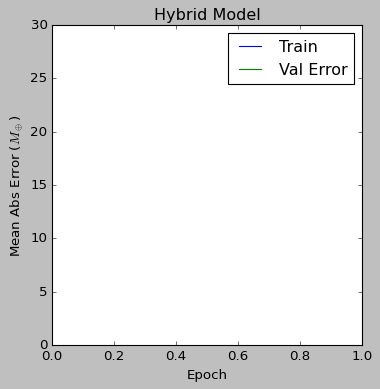

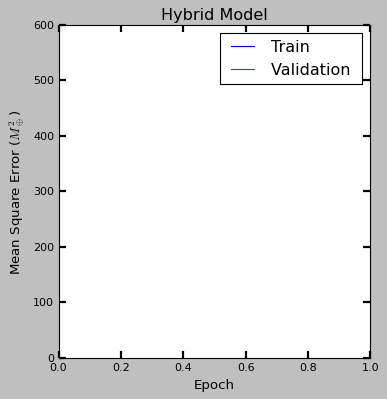

In [ ]:
# dp.plot_history(CNN_history,Model="CNN")
dp.plot_history(Hybrid_history,path,Model="hybrid")